In [1]:
from benchmark import compute_suggestions

In [6]:
from benchmark import eval_recouvrement

In [4]:
from script.preprocess_data import init_dataset

In [11]:
import pandas as pd

In [39]:
import matplotlib.pyplot as plt

In [2]:
url_dataset = "https://minio.lab.sspcloud.fr/shz42c/hackathon9001Z/EEC_hackathon.csv"
url_stromae = "https://stromae-9001z.kub.sspcloud.fr/questionnaire/90-01Z/unite-enquetee/90-01Z_01"
url_cip = "https://cip-9001z.kub.sspcloud.fr"
url_melauto ="https://melauto-9001z.kub.sspcloud.fr"
    

In [3]:
suggestions = compute_suggestions(url_dataset, url_stromae, url_cip, url_melauto)

Number of unique occupations (men) : 4806
Number of unique occupations (women) : 4672
2022-08-26 13:18:21.253571 - Process Melauto - Men
4263
2022-08-26 13:18:27.459420 - Process Melauto - Women
4152
2022-08-26 13:18:33.401427 - Process CIP - Men
4778
2022-08-26 13:21:13.843185 - Process CIP - Women
4651
2022-08-26 13:23:49.434755 - Process Stromae - Men
4126
2022-08-26 13:26:53.601690 - Process Stromae - Women
3870


In [5]:
data = init_dataset(url_dataset)

In [7]:
evaluation = eval_recouvrement(data,suggestions)

In [8]:
evaluation

{'M':                    label  total  melauto  stromae   cip
 0  Profession principale   5529     5449     3732  5333
 1  Profession secondaire    251      249      169   242
 2  Profession antérieure   1605     1573     1087  1535
 3     Profession du père    613      603      406   592,
 'F':                    label  total  melauto  stromae   cip
 0  Profession principale   5571     5521     3524  5486
 1  Profession secondaire    263      261      175   257
 2  Profession antérieure   1925     1917     1248  1909
 3  Profession de la mère    519      518      314   514}

In [9]:
type_prof = [
    {"id":"PCLCA","label":"Profession principale","sex":None},
    {"id":"PCLCA2J","label":"Profession secondaire","sex":None},
    {"id":"APCLCA","label":"Profession antérieure","sex":None},
    {"id":"FPCLCA","label":"Profession du père","sex":"M"},
    {"id":"MPCLCA","label":"Profession de la mère","sex":"F"}
]


In [28]:
def get_rank(text: str, suggestions: list[str]):
    try:
        return suggestions.index(text)+1
    except:
        return 0

In [65]:
data

,TRIM,SEXE,ACTEU,NBEMP,AAC,FPROF,FPROFPREC,MPROF,MPROFPREC,PCLCA,...,PROFM_PUBFIN,PROFM_CPF,PROFM_CPFR,PROFM_CPFFIN,PROFM_TAILLE,PROFM_TAILLER,PROFM_TAILLEFIN,PROFM_PCSRF,MPCLCANBECHO,MPCLCALIBELLEMAX
0,1,1,3,,1,,,,,,...,,,,,,,,,,
1,1,2,3,,1,,,,,,...,,,,,,,,,,
2,1,2,1,1,,,,,,Manipulatrice en électroradiologie,...,,,,,,,,,,
3,1,1,1,1,,,,,,Dessinateur projeteur industriel,...,,,,,,,,,,
4,1,1,1,1,,,,,,Contrôleur qualité de l'industrie,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88522,4,2,1,1,,,,1,,,...,9,9,,9,,,9,52B2,,
88523,4,2,3,,2,,,,,,...,,,,,,,,,,
88524,4,1,3,,1,1,,4,2,,...,,,,,,,,,,
88525,4,1,1,1,,1,,1,,,...,9,9,,9,,,9,43D2,,


In [41]:
concat_men = pd.DataFrame()

for t in type_prof:
    total = None
    id_prof = t["id"]
    
    if t["sex"] is None:
        data_sel = data.loc[(~data[id_prof].isna()) & (data[id_prof]!="") & (data[id_prof]!="999") & (data["SEXE"]=="1"),]
    elif t["sex"]=="M":
        data_sel = data.loc[(~data[id_prof].isna()) & (data[id_prof]!="") & (data[id_prof]!="999"),]
    else:
        data_sel =  pd.DataFrame(data={"text_input":[],"text_choice":[],})
    data_sel = data_sel.rename(columns={(id_prof+"LIBELLEMAX"):"text_input",id_prof:"text_choice"})
    data_sel = data_sel[["text_input","text_choice"]]
    data_sel.insert(loc=0,column="type_prof_label",value=[t["label"]]*data_sel.shape[0])
    data_sel.insert(loc=0,column="type_prof_id",value=[t["id"]]*data_sel.shape[0])
    data_sel.insert(loc=0,column="rank_melauto",value=[get_rank(y,suggestions["M"]["melauto"][x]) for x,y in zip(data_sel.text_input,data_sel.text_choice)])
    data_sel.insert(loc=0,column="rank_cip",value=[get_rank(y,suggestions["M"]["cip"][x]) for x,y in zip(data_sel.text_input,data_sel.text_choice)])
    data_sel.insert(loc=0,column="rank_stromae",value=[get_rank(y,suggestions["M"]["stromae"][x]) for x,y in zip(data_sel.text_input,data_sel.text_choice)])
    concat_men = pd.concat([concat_men,data_sel],ignore_index=True)

concat_men.rank_melauto = [int(x) for x in concat_men.rank_melauto]
concat_men.rank_cip = [int(x) for x in concat_men.rank_cip]
concat_men.rank_stromae = [int(x) for x in concat_men.rank_stromae]
concat_men = concat_men[["type_prof_id","type_prof_label","text_input","text_choice","rank_melauto","rank_cip","rank_stromae"]]

In [42]:
concat_men

,type_prof_id,type_prof_label,text_input,text_choice,rank_melauto,rank_cip,rank_stromae
0,PCLCA,Profession principale,Dessinateur in,Dessinateur projeteur industriel,2,12,6
1,PCLCA,Profession principale,contrôleur qualité,Contrôleur qualité de l'industrie,1,1,4
2,PCLCA,Profession principale,tech,Technicien d'assistance en informatique,10,161,0
3,PCLCA,Profession principale,VENDEUR,Vendeur d'articles de sport,10,71,0
4,PCLCA,Profession principale,apprenti macon,Apprenti maçon,1,1,1
...,...,...,...,...,...,...,...
7993,FPCLCA,Profession du père,prepar,Préparateur automobile,1,3,4
7994,FPCLCA,Profession du père,Mécani,Mécanicien d'entretien automobile,8,43,0
7995,FPCLCA,Profession du père,AGENT,Agent administratif des collectivités territor...,15,251,15
7996,FPCLCA,Profession du père,BATIMENT,Technicien du bâtiment,24,9,0


In [59]:
rank_melauto = list(concat_men.loc[concat_men["rank_melauto"]>0,"rank_melauto"])
rank_cip = list(concat_men.loc[concat_men["rank_cip"]>0,"rank_cip"])
rank_stromae = list(concat_men.loc[concat_men["rank_stromae"]>0,"rank_stromae"])


[1, 2, 3, 4]

In [70]:
# the histogram of the data
rank_choice = rank_melauto
def plot_single_hist(rank_choice):
    n, bins, patches = plt.hist(rank_choice, [x for x in range(min(rank_choice),max(rank_choice)+1)], density=True, facecolor='g', alpha=0.75)


    plt.xlabel('Smarts')
    plt.ylabel('Probability')
    plt.title('Histogram of IQ')
    plt.xlim(0, 30)
    plt.ylim(0, 0.5)
    plt.grid(True)
    plt.show()

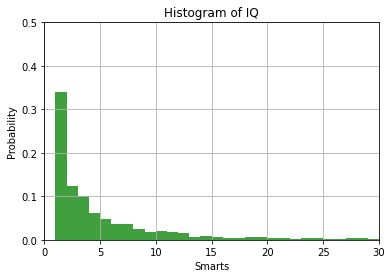

In [72]:
plot_single_hist(rank_melauto)

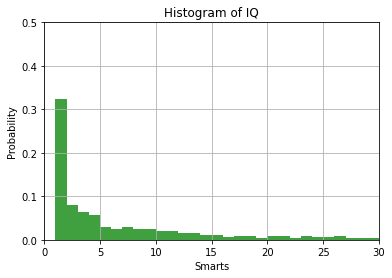

In [73]:
plot_single_hist(rank_cip)

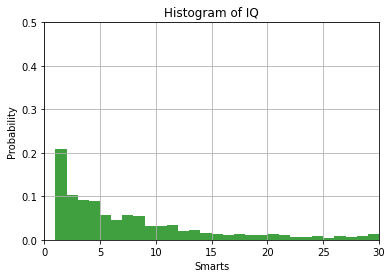

In [74]:
plot_single_hist(rank_stromae)

In [33]:
concat_men

,text_input,text_choice,found_melauto
0,vendeur fromagerie,Vendeur en fromagerie,1
1,technicien,Technicien en entretien industriel,42
2,frai,Ajusteur fraiseur,4
3,menuisier,Menuisier du bâtiment,3
4,gardien,Gardien de propriété,16
...,...,...,...
7993,clima,Climaticien,1
7994,app,Apprenti boucher,3
7995,soudeur,Soudeur de l'industrie des métaux,3
7996,AGRICULTEUR,Agriculteur en arboriculture,1
